In [ ]:
# ..... find markers for each cluster? ..... #

In [2]:
library(Seurat)
library(dplyr)

In [3]:
# gene lists
m1 = read.delim('~/septation/markers/Bayraktar_marker_genes.txt', sep = '\t')
m1[1:2,]

ctypes = m1$Cluster
top_markers = c()

for(ii in 1:length(ctypes)){
    temp = data.frame(compartment = m1$Compartment[ii], 
                      subtype = m1$Subtype[ii], cluster = m1$Cluster[ii],
                      gene = unique(unlist(stringr::str_split(m1$Gene[ii], ','))))
    top_markers = rbind(top_markers, temp)
}
top_markers[1:3,]

Compartment    Subtype              Cluster                  
1 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesLeft 
2 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesRight
  Gene                                                                                                
1 TNNT2,ACTN2,LDB3,CSRP3,SMPX,KCNMB2,PCDH7,RYR3,PANCR,MBP,NAV3,PITX2,NPTN,NPPA,MYL7,MYL4,MYH6,PPKAG2  
2 TNNT2,ACTN2,LDB3,CSRP3,SMPX,NTM,ROR1,KIF26B,PLC1,ANGPT1,BRINP3,BMP10,NPTN,NPPA,MYL7,MYL4,MYH6,PPKAG2
  Comments                                                
1 Genes NPPA,MYL7,MYL4,MYH6,PPKAG2 are from Kanemaru et al
2 Genes NPPA,MYL7,MYL4,MYH6,PPKAG2 are from Kanemaru et al

compartment    subtype              cluster                  gene 
1 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesLeft TNNT2
2 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesLeft ACTN2
3 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesLeft LDB3

In [4]:
papers = c('Asp', 'Feng', 'Hill', 'Knight-Schrijver', 'Mantri', 'Qiu', 
           'Farah', 'Kanemaru', 'Xu', 'Cui')

cols1 = c('predicted', 'predicted', 'predicted', 'class', 'predicted', 'class',
          'predicted', 'class', 'predicted', 'predicted')

In [5]:
# get list of samples
stages = c(rep('stage23', 2), rep(c('stage28', 'stage32'), each = 3))
samples = c('sample3', 'sample10', 'sample5', 'sample10', 'sample11',
           'sample5', 'sample10', 'sample12')

In [240]:
# load data
id = 2
file0 = paste0(stages[id], '_', samples[id], '_data.rds')
paste0(stages[id], '_', samples[id])

sce = readRDS(file0)
sce

[1] "stage23_sample10"

An object of class Seurat 
17007 features across 8287 samples within 1 assay 
Active assay: RNA (17007 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [241]:
files0 = list.files('annotations/')
files1 = files0[grep(paste0(stages[id], '_', samples[id]), files0)]
files1

[1] "stage23_sample10_Asp_celltypes.csv"               
 [2] "stage23_sample10_Cui_celltypes.csv"               
 [3] "stage23_sample10_Farah_celltypes.csv"             
 [4] "stage23_sample10_Feng_celltypes.csv"              
 [5] "stage23_sample10_Hill_celltypes.csv"              
 [6] "stage23_sample10_Kanemaru_celltypes.csv"          
 [7] "stage23_sample10_Knight-Schrijver_celltypes.csv"  
 [8] "stage23_sample10_Mantri_celltypes.csv"            
 [9] "stage23_sample10_Mantri_Seurat_label_transfer.csv"
[10] "stage23_sample10_Qiu_celltypes.csv"               
[11] "stage23_sample10_Xu_celltypes.csv"

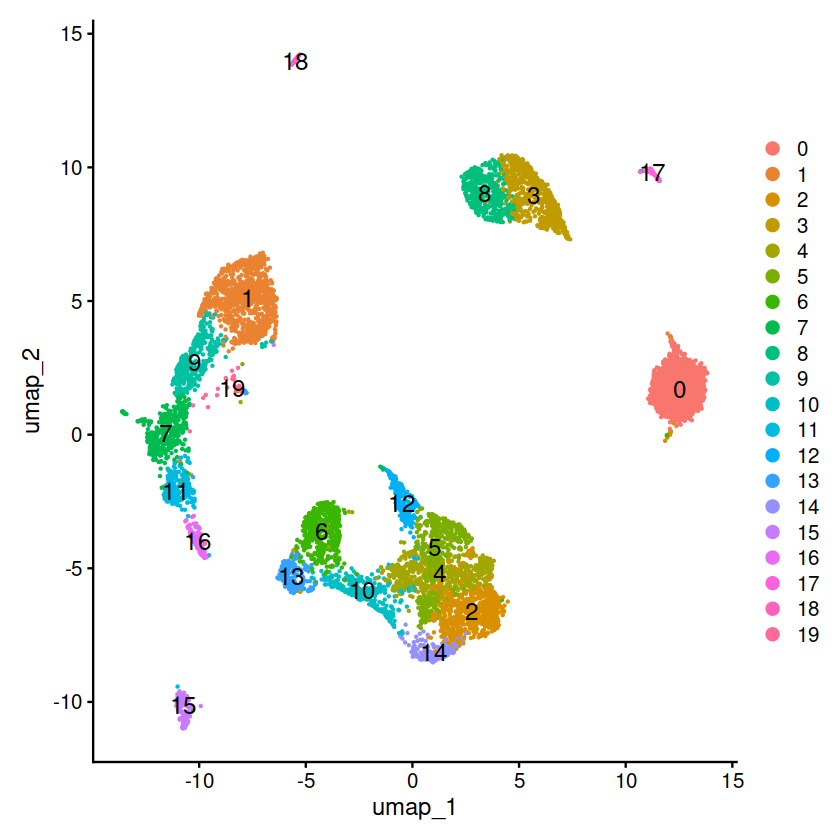

In [242]:
DimPlot(sce, reduction = 'umap', label = T, label.size = 5)

In [243]:
Idents(sce) <- "seurat_clusters"

In [244]:
# top markers
markers <- FindMarkers(object = sce, ident.1 = 19, only.pos = T)
head(markers)
rownames(markers)[1:50]

p_val        avg_log2FC pct.1 pct.2 p_val_adj   
PLA2G1B            4.168637e-80  9.980956  0.043 0     7.089602e-76
ENSGALG00010000437 4.168637e-80 10.333587  0.043 0     7.089602e-76
PRPH2              9.434084e-41  8.603121  0.043 0     1.604455e-36
ENSGALG00010012453 9.434084e-41  9.086876  0.043 0     1.604455e-36
FJX1               9.434084e-41  8.740805  0.043 0     1.604455e-36
ENSGALG00010001797 9.434084e-41  9.213447  0.043 0     1.604455e-36

[1] "PLA2G1B"            "ENSGALG00010000437" "PRPH2"             
 [4] "ENSGALG00010012453" "FJX1"               "ENSGALG00010001797"
 [7] "SLC45A2"            "ENSGALG00010011459" "CCDC92B"           
[10] "ENSGALG00010002881" "TSPAN10"            "ENSGALG00010001799"
[13] "AVP"                "ENSGALG00010029476" "ENSGALG00010027710"
[16] "PDZD3"              "PPP1R3G"            "RPS6KA2"           
[19] "ENSGALG00010021028" "A4GNT"              "MYOC"              
[22] "GTF2A1L"            "CYP3A5"             "SLC10A2"           
[25] "NPY4R"              "ENSGALG00010024979" "OASL"              
[28] "GNG11"              "RHOV"               "ENSGALG00010000853"
[31] "WSCD2"              "ENSGALG00010028297" "AMN"               
[34] "ENSGALG00010013185" "ENSGALG00010014560" "NFATC1"            
[37] "ANKS6"              "IL1R1"              "SOSTDC1"           
[40] "FRK"                "ENSGALG00010029155" "XPNPEP2"           
[43] "ENSGALG00010000476" "SLC12A3"            "ENSGALG00010005529"
[46] "DHRS4"              "LCA5L"              "STK32A"            
[49] "NRG1"               "STOML1"

In [245]:
options(warn = -1)

ctypes = unique(top_markers$cluster)
df2 = data.frame(celltype = ctypes, num_markers = NA, avg_rank = NA,
                min_rank = NA, best_gene = NA, genes = NA)

for(ii in 1:length(ctypes)){
    gset = unlist(top_markers$gene[top_markers$cluster==ctypes[ii]])
    vec2 = match(gset, rownames(markers))
    df2$num_markers[ii] = sum(!is.na(vec2))
    df2$avg_rank[ii] = round(mean(vec2, na.rm = T))
    df2$min_rank[ii] = min(vec2, na.rm = T)
    df2$best_gene[ii] = rownames(markers)[df2$min_rank[ii]]
    df2$genes[ii] = paste(rownames(markers)[sort(vec2[!is.na(vec2)])], collapse = ', ')
}

df2 %>% arrange(-(num_markers)) %>% head(., 15)

celltype                                   num_markers avg_rank min_rank
1  SchwannCells                               14          1656      83     
2  VentricularCardiomyocytesLeftCompact       12          2090     301     
3  VentricularCardiomyocytesLeftTrabeculated  11          1273     111     
4  DuctusArteriosusSmoothMuscleCells          10          2041     325     
5  GreatVesselArterialEndothelialCells        10          1533     118     
6  GreatVesselVenousEndothelialCells          10          1590     118     
7  VentricularCardiomyocytesRightTrabeculated  9          1685     111     
8  EpicardiumDerivedCells                      9          2525     614     
9  SchwannCellPrecursors                       9          1662     164     
10 AtrialCardiomyocytesLeft                    8           731     283     
11 AtrioventricularNodePackemakerCells         8           966      28     
12 GreatVesselSmoothMuscleCells                8          2192     653     
13 CoronaryArterialEndothelialCells            8          2169     118     
14 AtrialCardiomyocytesRight                   7          1531     136     
15 VentricularConductionSystemProximal         7          1596     305     
   best_gene
1  NRXN3    
2  FHL2     
3  MYOM2    
4  ROBO2    
5  PTPRB    
6  PTPRB    
7  MYOM2    
8  TPM1     
9  MEF2C    
10 KCNMB2   
11 GNG11    
12 PRDM6    
13 PTPRB    
14 ANGPT1   
15 SMPX     
   genes                                                                                                 
1  NRXN3, SEMA3B, MEF2C, COL14A1, TGFBR3, ZNF536, LAMA4, ERBB3, LAMB1, LAMA2, HSPG2, NR2F2, CDH6, OLFML2A
2  FHL2, SMPX, ADGRL2, LDB3, CRIM1, ACTN2, MGAT4C, TBX20, SYNDIG1, RABGAP1L, SLC1A3, LRMDA               
3  MYOM2, FHL2, SMPX, ADGRL2, SLIT3, LDB3, CRIM1, ACTN2, MGAT4C, CSMD1, SLC1A3                           
4  ROBO2, PDE3A, CHRM2, PCDH7, ELN, PDE4D, CSMD1, DCLK2, TNC, TAFA1                                      
5  PTPRB, PLXNA4, NRG3, CDH5, MEIS2, HMCN1, ELN, HSPG2, NLGN1, TIE1                                      
6  PTPRB, PLXNA4, NRG3, PCDH7, CDH5, MEIS2, HMCN1, HSPG2, TIE1, FBN1                                     
7  MYOM2, FHL2, SMPX, ENOX1, SLIT3, LDB3, ACTN2, NCALD, KCNIP4                                           
8  TPM1, KDR, CFI, WT1, CPB1, VEGFC, FLRT3, KRT18, MYRF                                                  
9  MEF2C, IL1RAPL2, PRKG1, ZNF536, LAMA4, ERBB3, PLS3, IL1RAP, CDH6                                      
10 KCNMB2, SMPX, NAV3, RYR3, PCDH7, LDB3, NPPA, ACTN2                                                    
11 GNG11, NRXN3, SMPX, LDB3, KCNJ3, ZNF536, ACTN2, NR2F2                                                 
12 PRDM6, PDE3A, THSD4, PCDH7, ELN, NLGN1, PTGER3, FBN1                                                  
13 PTPRB, CDH5, COL4A2, ADGRL4, ELN, HSPG2, TIE1, FBN1                                                   
14 ANGPT1, SMPX, LDB3, NPPA, ACTN2, NTM, ROR1                                                            
15 SMPX, PCDH7, LDB3, NAV1, ACTN2, PRDM16, FGF18

In [239]:
# MYH7 in atria, IRX4 in ventricles, ACTC1 and GJA5 in both - Mantri et al
paste0('MYH7   ', which(rownames(markers)=='MYH7'))
paste0('IRX4   ', which(rownames(markers)=='IRX4'))

[1] "MYH7   "

[1] "IRX4   "

In [185]:
which(rownames(markers)=='NKX2-5')
which(rownames(markers)=='PITX2')
which(rownames(markers)=='TBX5')

[1] 413

[1] 610

[1] 35

In [111]:
# get df of classifications and annos
df = c()

for(ii in 1:length(papers)){
    temp = read.delim(paste0('annotations/', stages[id], '_', samples[id], '_', papers[ii], '_celltypes.csv'), sep = ',')
    temp$study = papers[ii]
    temp$cluster = sce$seurat_clusters
    temp$anno = temp[,match(cols1[ii], colnames(temp))]
    df = rbind(df, temp[,c('study', 'cluster', 'anno')])
}

df$ctype = paste0(df$study, '_', df$anno)
head(df)

study cluster anno                 
stage28_sample11_AAACCCAAGAGAGGGC-1 Asp   0       Fibroblast connective
stage28_sample11_AAACCCAAGCTGGCTC-1 Asp   2       Fibroblast connective
stage28_sample11_AAACCCAAGGCCATAG-1 Asp   13      aCM                  
stage28_sample11_AAACCCAAGGTTGAGC-1 Asp   9       Fibroblast connective
stage28_sample11_AAACCCAAGTCTCGTA-1 Asp   4       vCM                  
stage28_sample11_AAACCCACACCTGCAG-1 Asp   9       Fibroblast connective
                                    ctype                    
stage28_sample11_AAACCCAAGAGAGGGC-1 Asp_Fibroblast connective
stage28_sample11_AAACCCAAGCTGGCTC-1 Asp_Fibroblast connective
stage28_sample11_AAACCCAAGGCCATAG-1 Asp_aCM                  
stage28_sample11_AAACCCAAGGTTGAGC-1 Asp_Fibroblast connective
stage28_sample11_AAACCCAAGTCTCGTA-1 Asp_vCM                  
stage28_sample11_AAACCCACACCTGCAG-1 Asp_Fibroblast connective

In [40]:
table(sce$seurat_clusters)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
1633 1013  710  662  586  543  446  425  418  368  317  225  206  204  171  123 
  16   17   18   19 
 108   59   47   23 

In [112]:
df %>% filter(cluster == 2) %>%
group_by(ctype) %>% reframe(count = n()) %>% arrange(-count) 

ctype                                        count
1  Kanemaru_regular ventricular cardiac myocyte 425  
2  Cui_C2 (CM)                                  412  
3  Hill_CM                                      348  
4  Farah_vCM                                    270  
5  Qiu_Cardiomyocytes                           269  
6  Feng_ventricular_cm                          258  
7  Mantri_Fibroblast cells                      253  
8  Asp_vCM                                      252  
9  Knight-Schrijver_Endothelial_Other           248  
10 Qiu_Mesoderm                                 208  
11 Knight-Schrijver_Cardiomyocytes              183  
12 Asp_aCM                                      177  
13 Farah_aCM                                    153  
14 Xu_atrioventricular canal                    152  
15 Feng_fibroblast-like                         141  
16 Mantri_Cardiomyocytes-2                      140  
17 Xu_cardiomyocyte-1                           140  
18 Xu_epithelium-1                               58  
19 Mantri_MT-enriched cardiomyocytes             55  
20 Feng_atrial_cm                                49  
21 Cui_C3 (Fibroblast-like cell)                 44  
22 Hill_CP1                                      41  
23 Knight-Schrijver_Immature_Cardiomyocytes      41  
24 Xu_epithelium-3                               40  
25 Xu_fibroblast-1                               38  
26 Hill_CM-LSV                                   32  
27 Farah_Fibro                                   31  
28 Feng_endocardial_ec                           30  
29 Cui_C4 (EC)                                   29  
30 Asp_Fibroblast connective                     27  
⋮  ⋮                                            ⋮    
58 Knight-Schrijver_Endocardial                 3    
59 Mantri_Endocardial cells                     3    
60 Xu_fibroblast-2                              3    
61 Feng_unassigned                              2    
62 Hill_CM-AVC                                  2    
63 Hill_EndoC                                   2    
64 Kanemaru_fibroblast                          2    
65 Knight-Schrijver_Fibroblasts                 2    
66 Mantri_Valve cells                           2    
67 Qiu_Primitive_erythroid                      2    
68 Xu_Second heart field (SHF)                  2    
69 Xu_cardiomyocyte like                        2    
70 Xu_endocardial derived cell                  2    
71 Xu_endocardium-2                             2    
72 Asp_Endothelium Pericytes Adventia           1    
73 Cui_C5 (Valvar cell)                         1    
74 Farah_Neuronal                               1    
75 Farah_unassigned                             1    
76 Hill_EndoV                                   1    
77 Hill_unassigned                              1    
78 Kanemaru_mast cell                           1    
79 Kanemaru_unassigned                          1    
80 Qiu_Endothelium                              1    
81 Qiu_Epithelial_cells                         1    
82 Qiu_Muscle_cells                             1    
83 Xu_Schwann progenitor like                   1    
84 Xu_Schwann progenitor-3                      1    
85 Xu_fibroblast-4                              1    
86 Xu_fibroblast-9                              1    
87 Xu_splanchnic LPM like                       1

In [41]:
ids = which(sce$seurat_clusters==1)
table(temp$predicted[ids])


          Cardiomyocytes-2          Endocardial cells 
                        85                        732 
      Epi-epithelial cells      Epi-mesenchymal cells 
                         2                          1 
          Fibroblast cells                Mural cells 
                       203                        135 
               Valve cells Vascular endothelial cells 
                         2                         26 